In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns
from numpy.random import randn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
ticker = 'VEDL'

In [4]:
start = dt.datetime(2019,1,1)
end = dt.datetime.now()

In [5]:
df = web.DataReader(ticker,'yahoo',start,end)
print(df.head(5))

             High    Low   Open  Close    Volume  Adj Close
Date                                                       
2018-12-31  11.55  11.37  11.51  11.54  265400.0  10.002314
2019-01-02  11.21  10.92  10.96  11.18  520200.0   9.690282
2019-01-03  10.79  10.59  10.77  10.63  408200.0   9.213569
2019-01-04  11.42  11.00  11.11  11.30  525700.0   9.794292
2019-01-07  11.28  11.06  11.22  11.18  432900.0   9.690282


In [6]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

Data Cleaning

In [7]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-05,12.87,12.55,12.70,12.80,1087900.0,12.80
2021-04-06,12.89,12.72,12.75,12.84,396300.0,12.84
2021-04-07,12.89,12.68,12.70,12.76,699800.0,12.76
2021-04-08,12.96,12.67,12.79,12.94,749800.0,12.94
2021-04-09,12.56,12.31,12.52,12.39,798600.0,12.39


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 2018-12-31 to 2021-04-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       573 non-null    float64
 1   Low        573 non-null    float64
 2   Open       573 non-null    float64
 3   Close      573 non-null    float64
 4   Volume     573 non-null    float64
 5   Adj Close  573 non-null    float64
dtypes: float64(6)
memory usage: 31.3 KB


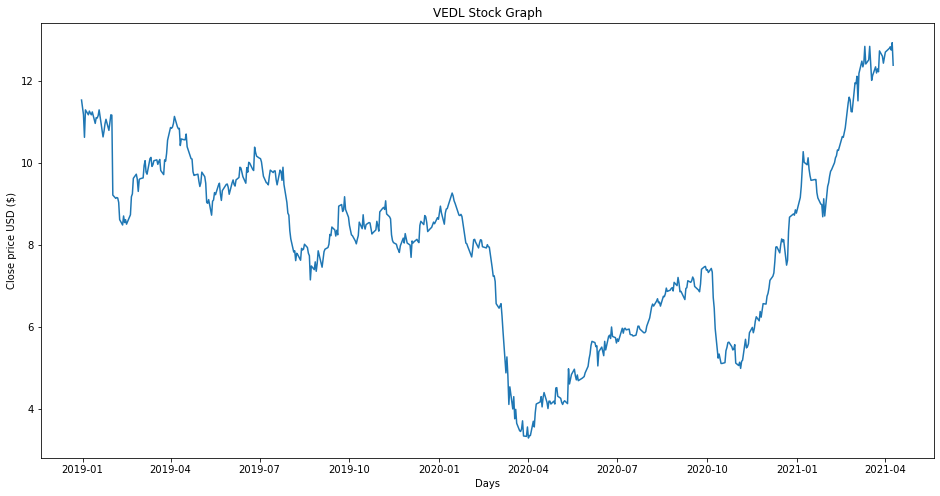

In [9]:
#Visualizing the close price data
plt.figure(figsize=(16,8))
plt.title(ticker +' Stock Graph')
plt.xlabel('Days')
plt.ylabel('Close price USD ($)')
plt.plot(df['Close'])
plt.show()

<AxesSubplot:xlabel='High', ylabel='count'>

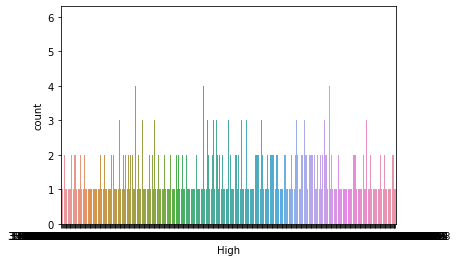

In [10]:
sns.countplot(x = df["High"])

<AxesSubplot:xlabel='Low', ylabel='count'>

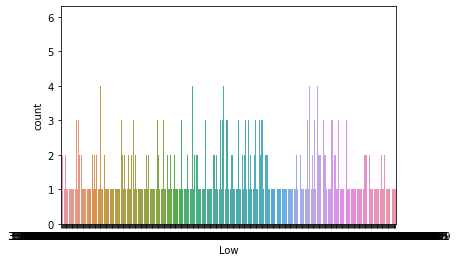

In [11]:
sns.countplot(x = df["Low"])

<AxesSubplot:xlabel='Open', ylabel='count'>

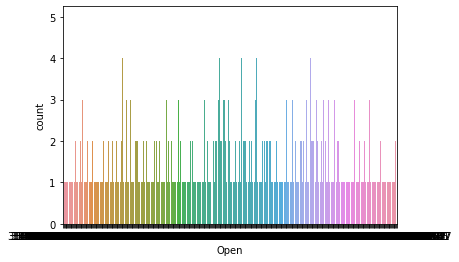

In [12]:
sns.countplot(x = df["Open"])

<AxesSubplot:xlabel='Close', ylabel='count'>

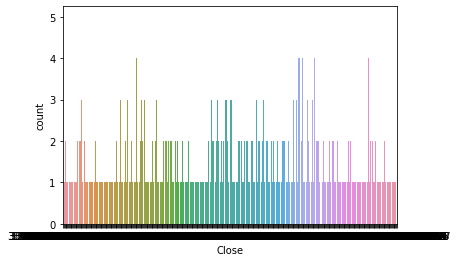

In [13]:
sns.countplot(x = df["Close"])

<AxesSubplot:xlabel='Volume', ylabel='count'>

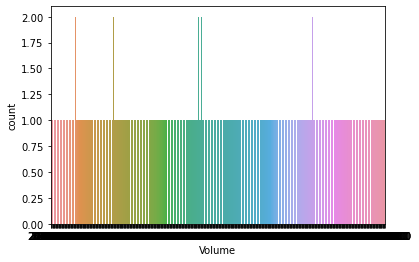

In [14]:
sns.countplot(x = df["Volume"])

In [15]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,11.55,11.37,11.51,11.54,265400.0,10.002314
2019-01-02,11.21,10.92,10.96,11.18,520200.0,9.690282
2019-01-03,10.79,10.59,10.77,10.63,408200.0,9.213569
2019-01-04,11.42,11.00,11.11,11.30,525700.0,9.794292
2019-01-07,11.28,11.06,11.22,11.18,432900.0,9.690282


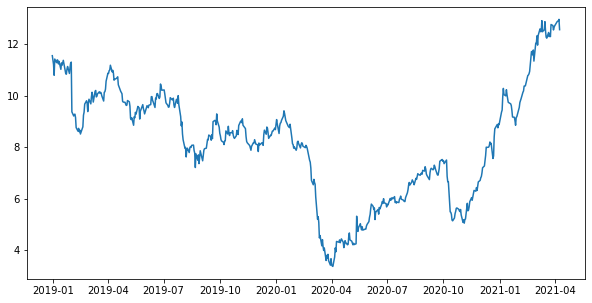

In [16]:
fig = plt.figure(figsize = (10,5))
plt.plot(df["High"],label = "Og")


<AxesSubplot:>

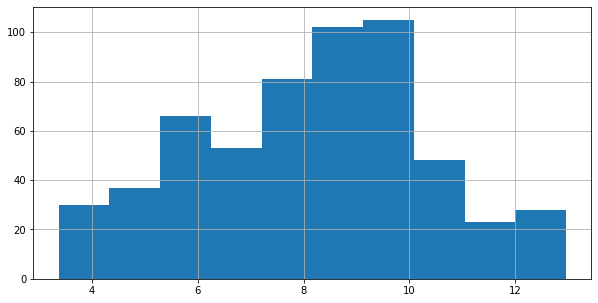

In [17]:
fig = plt.figure(figsize = (10,5))
df["High"].hist()

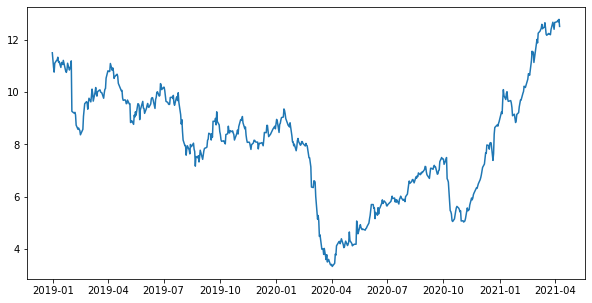

In [18]:
fig = plt.figure(figsize = (10,5))
plt.plot(df["Open"],label = "Og")


<AxesSubplot:>

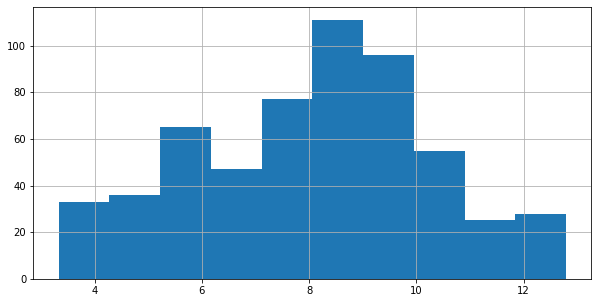

In [19]:
fig = plt.figure(figsize = (10,5))
df["Open"].hist()

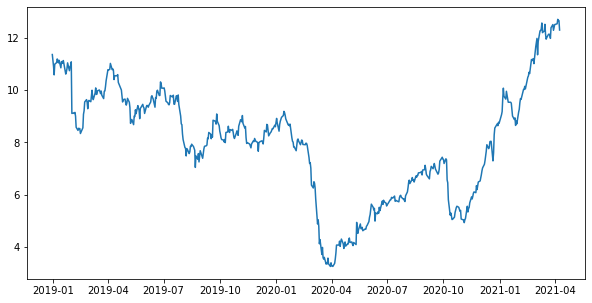

In [20]:
fig = plt.figure(figsize = (10,5))
plt.plot(df["Low"],label = "Og")


<AxesSubplot:>

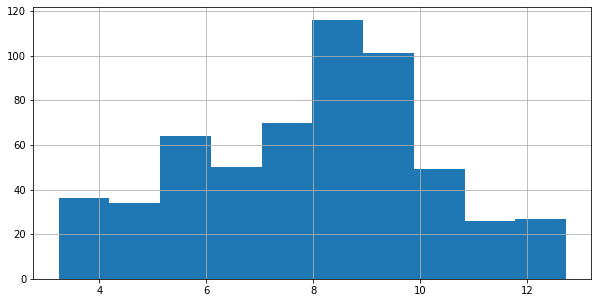

In [21]:
fig = plt.figure(figsize = (10,5))
df["Low"].hist()

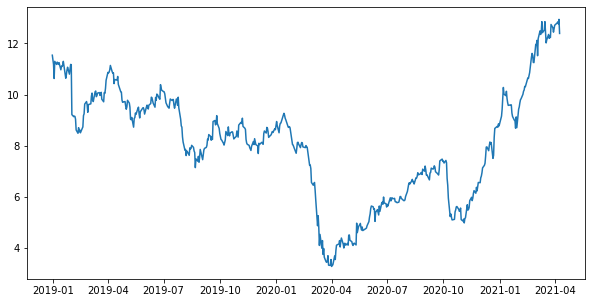

In [22]:
fig = plt.figure(figsize = (10,5))
plt.plot(df["Close"],label = "Og")


<AxesSubplot:>

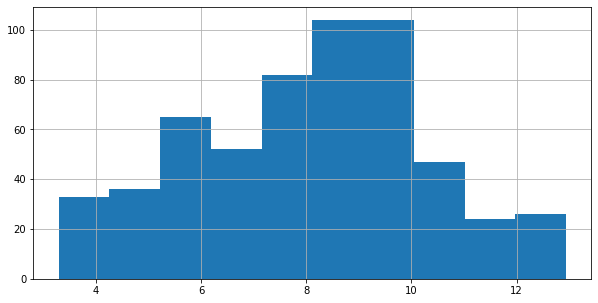

In [23]:
fig = plt.figure(figsize = (10,5))
df["Close"].hist()

In [24]:
df.head(15)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,11.55,11.37,11.51,11.54,265400.0,10.002314
2019-01-02,11.21,10.92,10.96,11.18,520200.0,9.690282
2019-01-03,10.79,10.59,10.77,10.63,408200.0,9.213569
2019-01-04,11.42,11.00,11.11,11.30,525700.0,9.794292
2019-01-07,11.28,11.06,11.22,11.18,432900.0,9.690282
2019-01-08,11.39,11.20,11.24,11.27,522300.0,9.768291
2019-01-09,11.37,11.15,11.34,11.22,854800.0,9.724953
2019-01-10,11.23,11.05,11.16,11.18,367800.0,9.690282
2019-01-11,11.33,11.15,11.18,11.25,462200.0,9.750956


In [25]:
#Predicting Y as close values
x = df[['High','Low','Open','Volume']].values
y = df['Close'].values

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=0)

In [27]:
regressor = LinearRegression()

In [28]:
regressor.fit(x_train,y_train)

LinearRegression()

In [29]:
print(regressor.coef_)

[ 7.73699740e-01  6.69245810e-01 -4.40869399e-01 -1.22434396e-08]


In [30]:
print(regressor.intercept_)

-0.012373581333985584


In [31]:
predicted = regressor.predict(x_test)

In [32]:
print(predicted)

[ 9.88807884  6.82852808  3.30744422  5.99839995  6.96360758  9.65882627
  6.8896392   9.45243611  7.9752658   7.91982786  6.71468441  8.26448322
 10.7094229   5.98339803 12.29271084  5.90489018 10.41869483  8.06558665
  3.80929766  5.13416258  9.16894708  8.38763411  9.58687661  9.28297077
  4.8800576   8.6242109   9.76261131  7.61780261  7.19224031  4.22961888
  9.36612483 10.72160441 10.9310838   3.74023194 11.13066717  6.60049186
 10.03490385  4.91670949  8.28169075  8.17070275  4.6633472   9.80211918
  7.10304085  6.38980904  8.24307702  5.40779371 11.22097779 10.01307504
  5.81459412  9.09325328  3.28118753 12.73181612  9.06691853  5.46594474
  4.80604366  7.00075746 10.77412603 11.22869392  5.7513817   6.58834082
  7.14678231  8.08163417  3.91318776  6.89263316 12.67651759 11.49760022
  3.40327588  6.12853158  8.4207043  10.38125963  7.38362723  8.22381698
 11.12192245  6.03784065 11.09014013 10.2432364  12.84621983  9.82775349
  5.73443826  9.80195332  6.12117607  8.93722965  8

In [33]:
df=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':predicted.flatten()})

In [34]:
df.head(25)

,Actual,Predicted
0,9.90,9.888079
1,6.90,6.828528
2,3.35,3.307444
3,6.02,5.998400
4,6.94,6.963608
5,9.67,9.658826
6,6.90,6.889639
7,9.48,9.452436
8,7.93,7.975266
9,7.90,7.919828


In [35]:
print("Value of R square: ", regressor.score(x,y))

Value of R square:  0.9994356604782751


In [36]:
import math
import sklearn.metrics as metrics

In [37]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error: 0.04312266127093793
Mean Squared Error: 0.003907132413790479
Root Mean Squared Error: 0.06250705891169796


In [38]:
graph = df.head(50)

<AxesSubplot:>

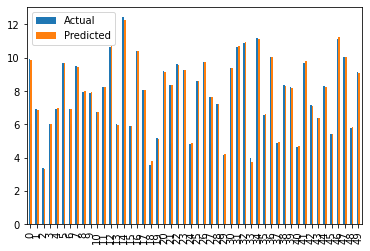

In [39]:
graph.plot(kind='bar')

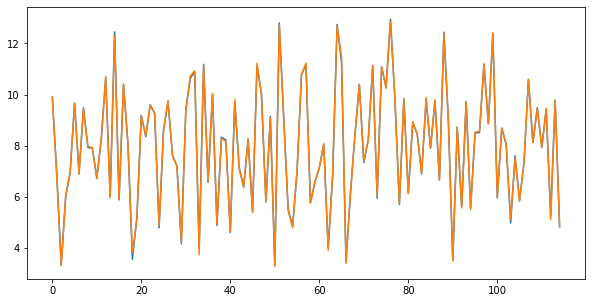

In [40]:
fig = plt.figure(figsize = (10,5))
plt.plot(df["Actual"], label= "Actual")
plt.plot(df["Predicted"], label = "Predicted")

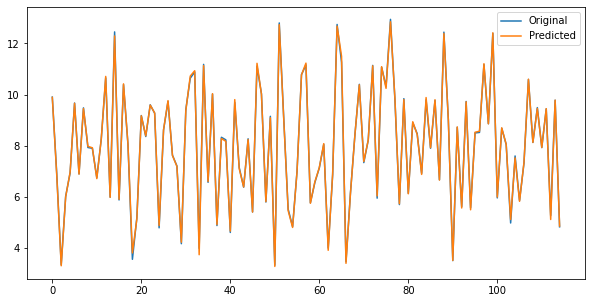

In [41]:
df= df.head(150)
fig = plt.figure(figsize = (10,5))
plt.plot(df["Actual"],label = "Original")
plt.plot(df["Predicted"],label = "Predicted")
plt.legend()

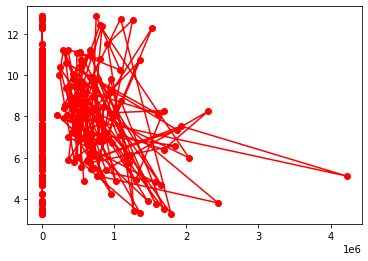

In [51]:
plt.plot(x_test,predicted ,color = "r",marker = "o")
# blue : actual value
# red : predicted value